<a href="https://colab.research.google.com/github/ernest-ricks/ernest-ricks.github.io/blob/main/ANN_Digit_Recognition_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

**Let us check the version of tensorflow.**

In [ ]:
tf.__version__

'2.12.0'

## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
import h5py

h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]

h5f.close()

Check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

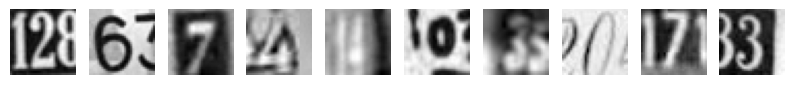

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# Visualizing the first 10 images in the dataset and printing their labels

plt.figure(figsize = (10, 1))

for i in range(10):

    plt.subplot(1, 10, i+1)

    plt.imshow(X_train[i], cmap = "gray")

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
X_train.shape

X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)


### **Normalize the train and the test data**

In [ ]:

X_train_normal = X_train.astype('float')/255.0

X_test_normal = X_test.astype('float')/255.0

Print the shapes of Training and Test data

In [ ]:
# New shape

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


### **One-hot encode output**

In [ ]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)

y_test_encoded = tf.keras.utils.to_categorical(y_test)

**Observation:**


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
from keras.optimizers.legacy.gradient_descent import SGD
# Initialize Sequential

ann_model = Sequential()

# A a hidden layer with 64 nodes and relu activation w/ input shape = 1024
ann_model.add(Dense(64, activation = 'relu', input_shape = (1024,)))

# Second hidden layer with 32 nodes and the relu activation
ann_model.add(Dense(32, activation = 'relu'))

#Output layer with activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10
ann_model.add(Dense(10, activation = 'softmax'))

# SGD optimizer

opt = SGD(learning_rate=0.01, momentum=0.9)

#compile the model
ann_model.compile(optimizer=opt,
                  loss = 'categorical_crossentropy',
                  metrics =['accuracy'])

def nn_model_1(): model = ann_model

ann_model.summary()

history = ann_model.fit(
    X_train_normal, y_train_encoded,
    epochs = 20,
    validation_split = 0.2,
    shuffle = True,
    batch_size = 128,
    verbose = 1
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                65600     
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
263/263 [==============================] - 3s 7ms/step - loss: 2.2936 - accuracy: 0.1263 - val_loss: 2.2709 - val_accuracy: 0.1482
Epoch 2/20
263/263 [==============================] - 2s 6ms/step - loss: 2.1201 - accuracy: 0.2684 - val_loss: 1.8854 - val_accuracy: 0.3829
Epoch 3/20
263/263 [==========

### **Plot the Training and Validation Accuracies and write down your Observations.**

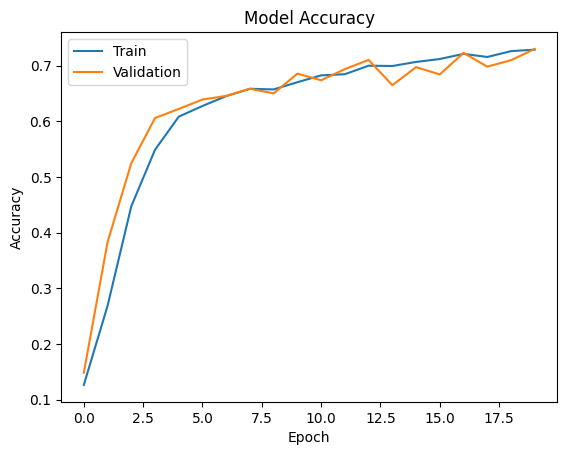

In [ ]:
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title ('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel ('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

**Observations:We can see the train and validation data both peak at about 70% accuracy. The accuracy trends upward with each epoch however it starts very low at about 10%.**

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
from tensorflow.keras import backend
backend.clear_session()

import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
ann_model = Sequential()

# A a hidden layer with 256 nodes and relu activation w/ input shape = 1024
ann_model.add(Dense(256, activation = 'relu', input_shape = (1024,)))

# Second hidden layer with 128 nodes and the relu activation
ann_model.add(Dense(128, activation = 'relu'))

# Dropout Layer
ann_model.add(Dropout(0.2))

#3rd, 4th, 6th Hidden Layers

ann_model.add(Dense(64, activation = 'relu'))
ann_model.add(Dense(64, activation = 'relu'))
ann_model.add(Dense(32, activation = 'relu'))

# Batch normalization
ann_model.add (BatchNormalization())

#Output layer with activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10
ann_model.add(Dense(10, activation = 'softmax'))

ann_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])


def nn_model_2(): model = ann_model

ann_model.summary()

history = ann_model.fit(
    X_train_normal, y_train_encoded,
    epochs = 30,
    validation_split = 0.2,
    shuffle = True,
    batch_size = 128,
    verbose = 1
)



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               262400    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)              

### **Plot the Training and Validation Accuracies and write down your Observations.**

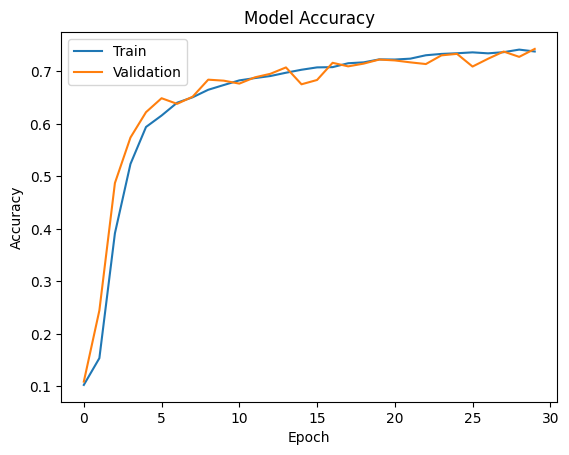

In [ ]:
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title ('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel ('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

**Observations:This model appears to be slightly more accurate than the first.**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

563/563 [==============================] - 5s 10ms/step
              precision    recall  f1-score   support

           0       0.78      0.63      0.70      1814
           1       0.50      0.82      0.62      1828
           2       0.83      0.57      0.67      1803
           3       0.84      0.49      0.62      1719
           4       0.39      0.86      0.54      1812
           5       0.72      0.57      0.64      1768
           6       0.64      0.67      0.66      1832
           7       0.70      0.72      0.71      1808
           8       0.69      0.45      0.54      1812
           9       0.79      0.45      0.57      1804

    accuracy                           0.62     18000
   macro avg       0.69      0.62      0.63     18000
weighted avg       0.69      0.62      0.63     18000



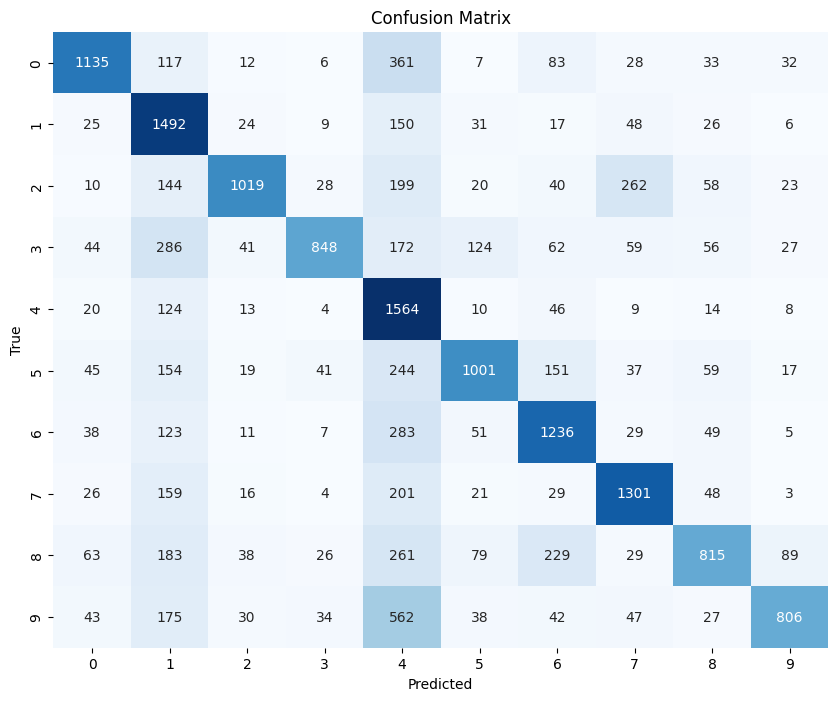

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix

predictions = ann_model.predict(X_test)
predictions = np.argmax(predictions, axis=-1)
y_true = np.argmax(y_test_encoded, axis=1)

# Printing the classification report
print(classification_report(y_true, predictions))

# Computing the confusion matrix
cm = confusion_matrix(y_true, predictions)




**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

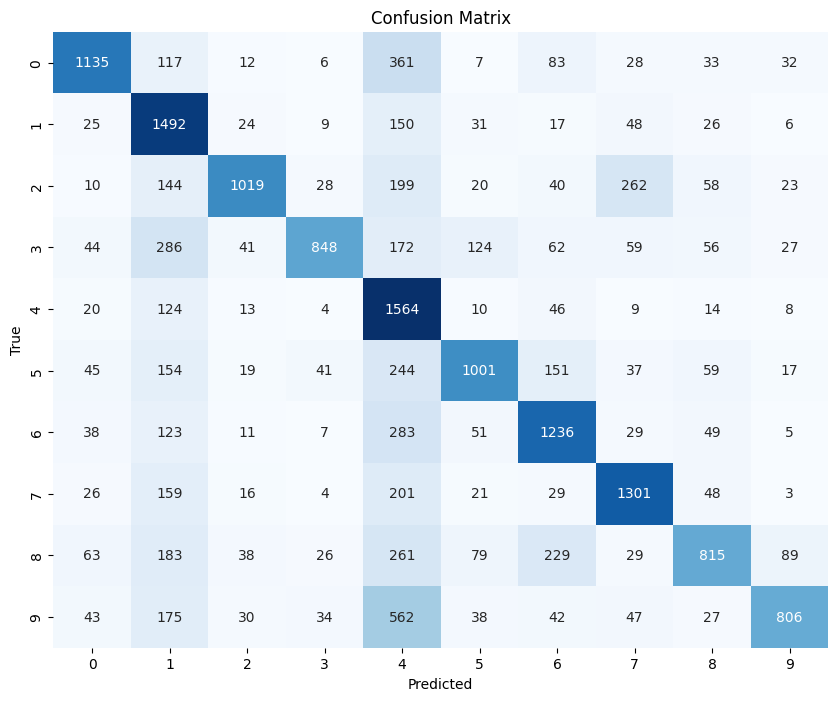

In [ ]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

**Numbers 1, 4 and 7 seem to create the most errors. This may be due to 1 and 7 looking alike 4 may also be confused with 9.:__________**

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
import h5py

h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]

h5f.close()

Check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

**Observation:**


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
X_train.shape


y_train_encoded = tf.keras.utils.to_categorical(y_train)

y_test_encoded = tf.keras.utils.to_categorical(y_test)

Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

Normalize inputs from 0-255 to 0-1

In [ ]:
X_train_normal = X_train.astype('float')/255.0

X_test_normal = X_test.astype('float')/255.0

Print New shape of Training and Test

In [ ]:

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)

y_test_encoded = tf.keras.utils.to_categorical(y_test)

**Observation:**


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
from tensorflow.keras import backend
backend.clear_session()

import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
def create_cnn_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 1)),
        tf.keras.layers.LeakyReLU(0.1),
        tf.keras.layers.Conv2D(32, (3, 3), padding='same'),
        tf.keras.layers.LeakyReLU(0.1),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32),
        tf.keras.layers.LeakyReLU(0.1),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

# Create the model
model = create_cnn_model()

opt = SGD(learning_rate=0.01, momentum=0.9)

#compile the model
ann_model.compile(optimizer=opt,
                  loss = 'categorical_crossentropy',
                  metrics =['accuracy'])

def nn_model_3(): model = model

model.summary()



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                      

### **Plot the Training and Validation Accuracies and Write your observations.**

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=-1)
y_true = np.argmax(y_test_encoded, axis=1)

# Printing the classification report
print(classification_report(y_true, predictions))

# Computing the confusion matrix
cm = confusion_matrix(y_true, predictions)

563/563 [==============================] - 17s 30ms/step
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1814
           1       0.10      0.70      0.18      1828
           2       0.14      0.00      0.00      1803
           3       0.07      0.01      0.02      1719
           4       0.00      0.00      0.00      1812
           5       0.00      0.00      0.00      1768
           6       0.10      0.07      0.08      1832
           7       0.00      0.00      0.00      1808
           8       0.11      0.26      0.16      1812
           9       0.18      0.00      0.00      1804

    accuracy                           0.11     18000
   macro avg       0.17      0.10      0.04     18000
weighted avg       0.17      0.11      0.04     18000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Observations:__________**

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

563/563 [==============================] - 16s 28ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1814
           1       0.10      0.70      0.18      1828
           2       0.14      0.00      0.00      1803
           3       0.07      0.01      0.02      1719
           4       0.00      0.00      0.00      1812
           5       0.00      0.00      0.00      1768
           6       0.10      0.07      0.08      1832
           7       0.00      0.00      0.00      1808
           8       0.11      0.26      0.16      1812
           9       0.18      0.00      0.00      1804

    accuracy                           0.11     18000
   macro avg       0.17      0.10      0.04     18000
weighted avg       0.17      0.11      0.04     18000



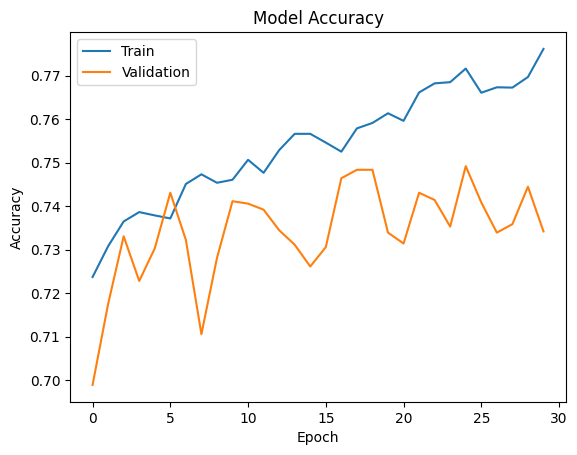

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=-1)
y_true = np.argmax(y_test_encoded, axis=1)




### **Plot the Training and Validation accuracies and write your observations.**

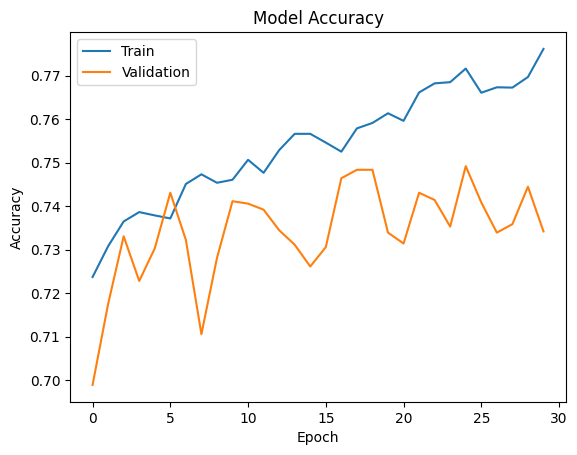

In [ ]:


plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title ('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel ('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

**Observations:The train and validations data is not trending together. The recall is very low but accuracy seems stable.**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=-1)
y_true = np.argmax(y_test_encoded, axis=1)

# Printing the classification report
print(classification_report(y_true, predictions))

# Computing the confusion matrix
cm = confusion_matrix(y_true, predictions)


563/563 [==============================] - 16s 28ms/step
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1814
           1       0.10      0.70      0.18      1828
           2       0.14      0.00      0.00      1803
           3       0.07      0.01      0.02      1719
           4       0.00      0.00      0.00      1812
           5       0.00      0.00      0.00      1768
           6       0.10      0.07      0.08      1832
           7       0.00      0.00      0.00      1808
           8       0.11      0.26      0.16      1812
           9       0.18      0.00      0.00      1804

    accuracy                           0.11     18000
   macro avg       0.17      0.10      0.04     18000
weighted avg       0.17      0.11      0.04     18000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:Seems to be very close to the train data in obersvation. The recall is much lower now.  **